# Introduction

Milestone 2

Nama: Muhammad Nur Alamsyah

Batch: RMT-023

Link Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

**Penjelasan Dataset**

Dataset "Telco Customer Churn" dikeluarkan oleh IBM. Dataset ini memuat data dari sebuah perusahaan telekomunikasi di California yang menawarkan layanan internet dan telepon kepada 7.043 pelanggan. Dataset ini memberikan detail tentang pelanggan yang memilih untuk tetap berlangganan serta mereka yang memutuskan untuk berhenti berlangganan.

**Apa Itu Churn**

Dalam konteks bisnis, 'churn' merujuk pada situasi ketika pelanggan memutuskan untuk mengakhiri langganan atau berhenti memanfaatkan layanan yang ditawarkan.

**Mengapa penting memperhatikan customer churn**

Mendapatkan pelanggan baru seringkali lebih menantang dan memerlukan biaya yang lebih besar dibandingkan dengan mempertahankan pelanggan yang sudah ada. Stabilitas pendapatan perusahaan dapat terganggu oleh tingginya tingkat customer churn, sehingga mempersulit penetapan keputusan bisnis di masa depan. Karena itu, sangat esensial bagi perusahaan untuk menganalisis dan merancang strategi guna mengurangi risiko customer churn.

**Objective**

Notebook ini bertujuan untuk menganalisis dataset "Telco Customer Churn" dengan fokus pada prediksi apakah pelanggan akan tetap berlangganan atau memilih untuk berhenti (churn). Dalam analisis ini, penulis akan menggunakan model klasifikasi yaitu KNN, SVM, Decision Tree, Random Forest, dan XGBoost. Metrics yang dipakai adalah recall untuk meminimalkan False Negative.

# Import Libraries

In [5]:
# Dataset Library
import pandas as pd 
import numpy as np 

# Exploratory Data Analysis Library
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import matplotlib.cm as cm
import plotly.graph_objects as go
import plotly.express as px 

# Preprocessing Data Library
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer

# Model Definition and Training Library
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

# Model Evaluation Library
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

# Model Saving Library
import pickle
import joblib
import json

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [6]:
# Load data dari file csv

df = pd.read_csv('Telco-Customer-Churn.csv')

In [7]:
fd = df.head(5);
fd.drop('Churn', axis=1, inplace=True)
fd.to_csv('inference.csv')

In [8]:
# Menampilkan 10 baris pertama dataframe

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
# Menampilkan 10 baris terakhir dataframe

df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
# Menampilkan ukuran dataframe

df.shape

(7043, 21)

In [11]:
# Menampilkan list dari column dataframe

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Terdapat sebanyak 21 kolom dengan 20 kolom feature dan 1 kolom target. Berikut ini adalah deskripsi pada masing-masing kolom:

- CustomerID: A unique ID that identifies each customer.

- Gender: The customer’s gender: Male, Female

- Senior Citizen: Indicates if the customer is 65 or older: Yes, No

- Partner: Indicates if the customer is married: Yes, No

- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

- Tenure: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

- Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

- Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

- Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

- Monthly Charges: Indicates the customer’s current total monthly charge for all their services from the company.

- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

- Churn: Yes = the customer left the company this quarter. No = the customer remained with the company.

In [12]:
# Membuat copy dari df

df_copy = df.copy()

In [13]:
# Menampilkan info dari df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari info di atas, terdapat kolom dengan tipe data yang tidak tepat yaitu kolom `TotalCharges`. Kolom ini seharusnya bertipe numeric.

In [14]:
# Merubah karakter ' ' sebagai null value
df['TotalCharges'].replace(' ', np.nan, inplace=True)

# Mengganti kolom TotalCharges ke float
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Kolom lain yang kurang tepat adalah `SeniorCitizen`. Kolom ini kategorikal yang sudah diencoding. Untuk memudahkan, kolom ini diubah terlebih dahulu ke object saja.

In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [16]:
# Menampilkan banyak null value 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Terdapat 11 null value pada dataframe. Karena jumlahnya sedikit, maka dapat di-drop nantinya.

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Kolom kategorik pada data adalah `customerID`, `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `Churn`

In [18]:
# Menampilkan kardinalitas kolom kategorik

df[cat_cols].nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

Kardinalitas tinggi terjadi pada kolom `customerID`. Kolom ini nantinya akan didrop karena tidak relevan dengan churn.

In [19]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
# Cek duplicate value

df.duplicated().sum()

0

Tidak ada duplicate value pada dataset

# Exploratory Data Analysis

**Perbandingan churn vs tidak churn**

<Axes: ylabel='count'>

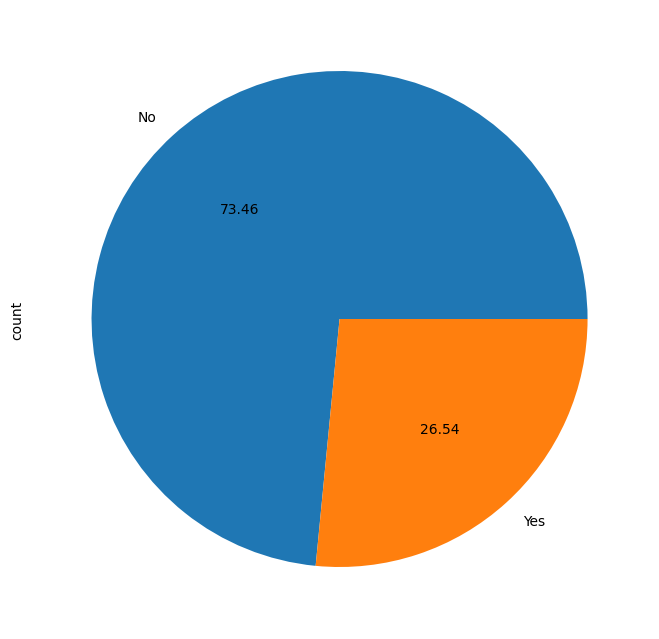

In [21]:
# Menampilkan pie chart pada kolom churn

df['Churn'].value_counts().plot(kind='pie', figsize=(8  ,10), autopct='%.2f')

Dari pie chart di atas, sebanyak 73% customer tidak churn, sementara 27% sisanya churn. Ini menunjukkan bahwa proporsi keduanya inbalance.

Kemudian akan dilihat bagaimana persebaran data numerik

In [22]:
# Function untuk membuat boxplot dan histogram

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

In [23]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


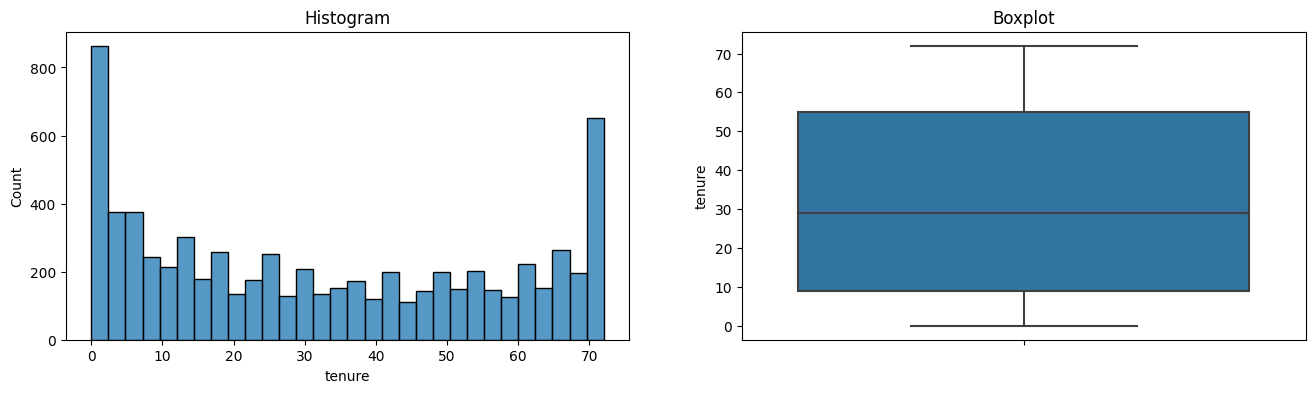


Skewness Value tenure X_train:  0.2395397495619829


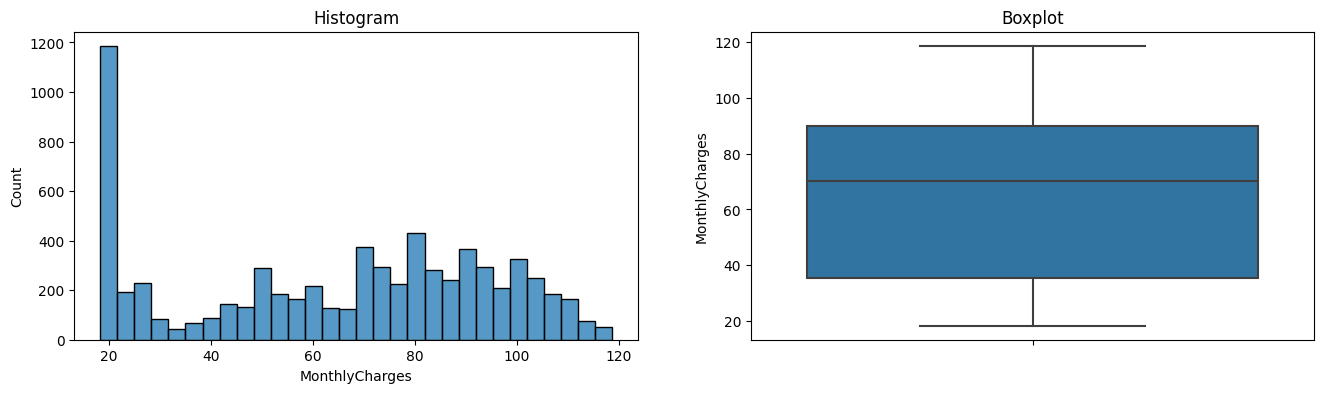


Skewness Value MonthlyCharges X_train:  -0.22052443394398033


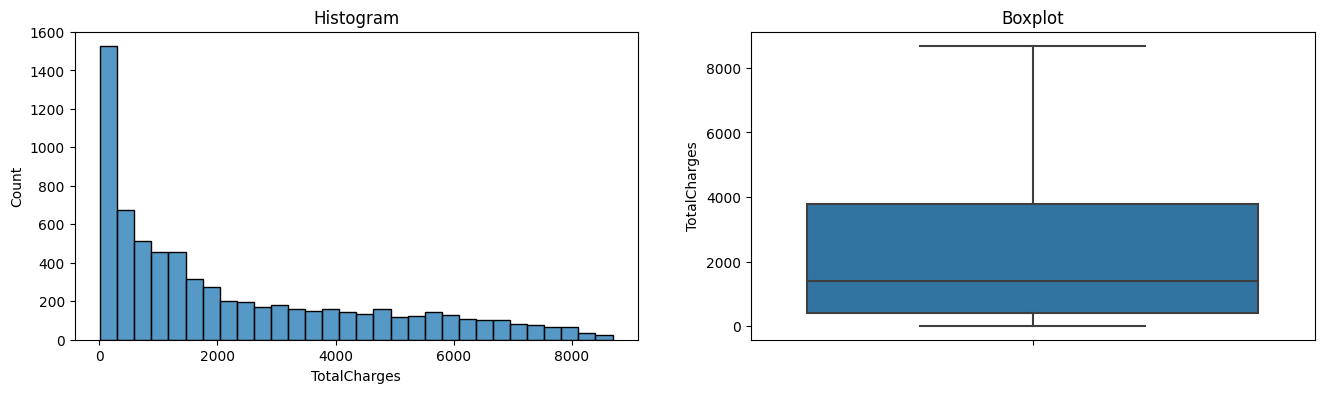


Skewness Value TotalCharges X_train:  0.961642499724251


In [24]:
# Cek distribusi dari fitur numerik (boxplot dan histogram)

diagnostic_plots(df, 'tenure')
print('\nSkewness Value tenure X_train: ', df['tenure'].skew())

diagnostic_plots(df, 'MonthlyCharges')
print('\nSkewness Value MonthlyCharges X_train: ', df['MonthlyCharges'].skew())

diagnostic_plots(df, 'TotalCharges')
print('\nSkewness Value TotalCharges X_train: ', df['TotalCharges'].skew())

Terlihat dari boxplot di atas bahwa **tidak terdapat outlier** dari masing-masing numerical feature. Sementara itu skewness masih berkisari dari -1 hingga 1 sehingga bisa dikatakan kolom numerik **berdistribusi normal**.

Berikut barplot dari masing-masing kolom kategorikal (kecuali CustomerID)

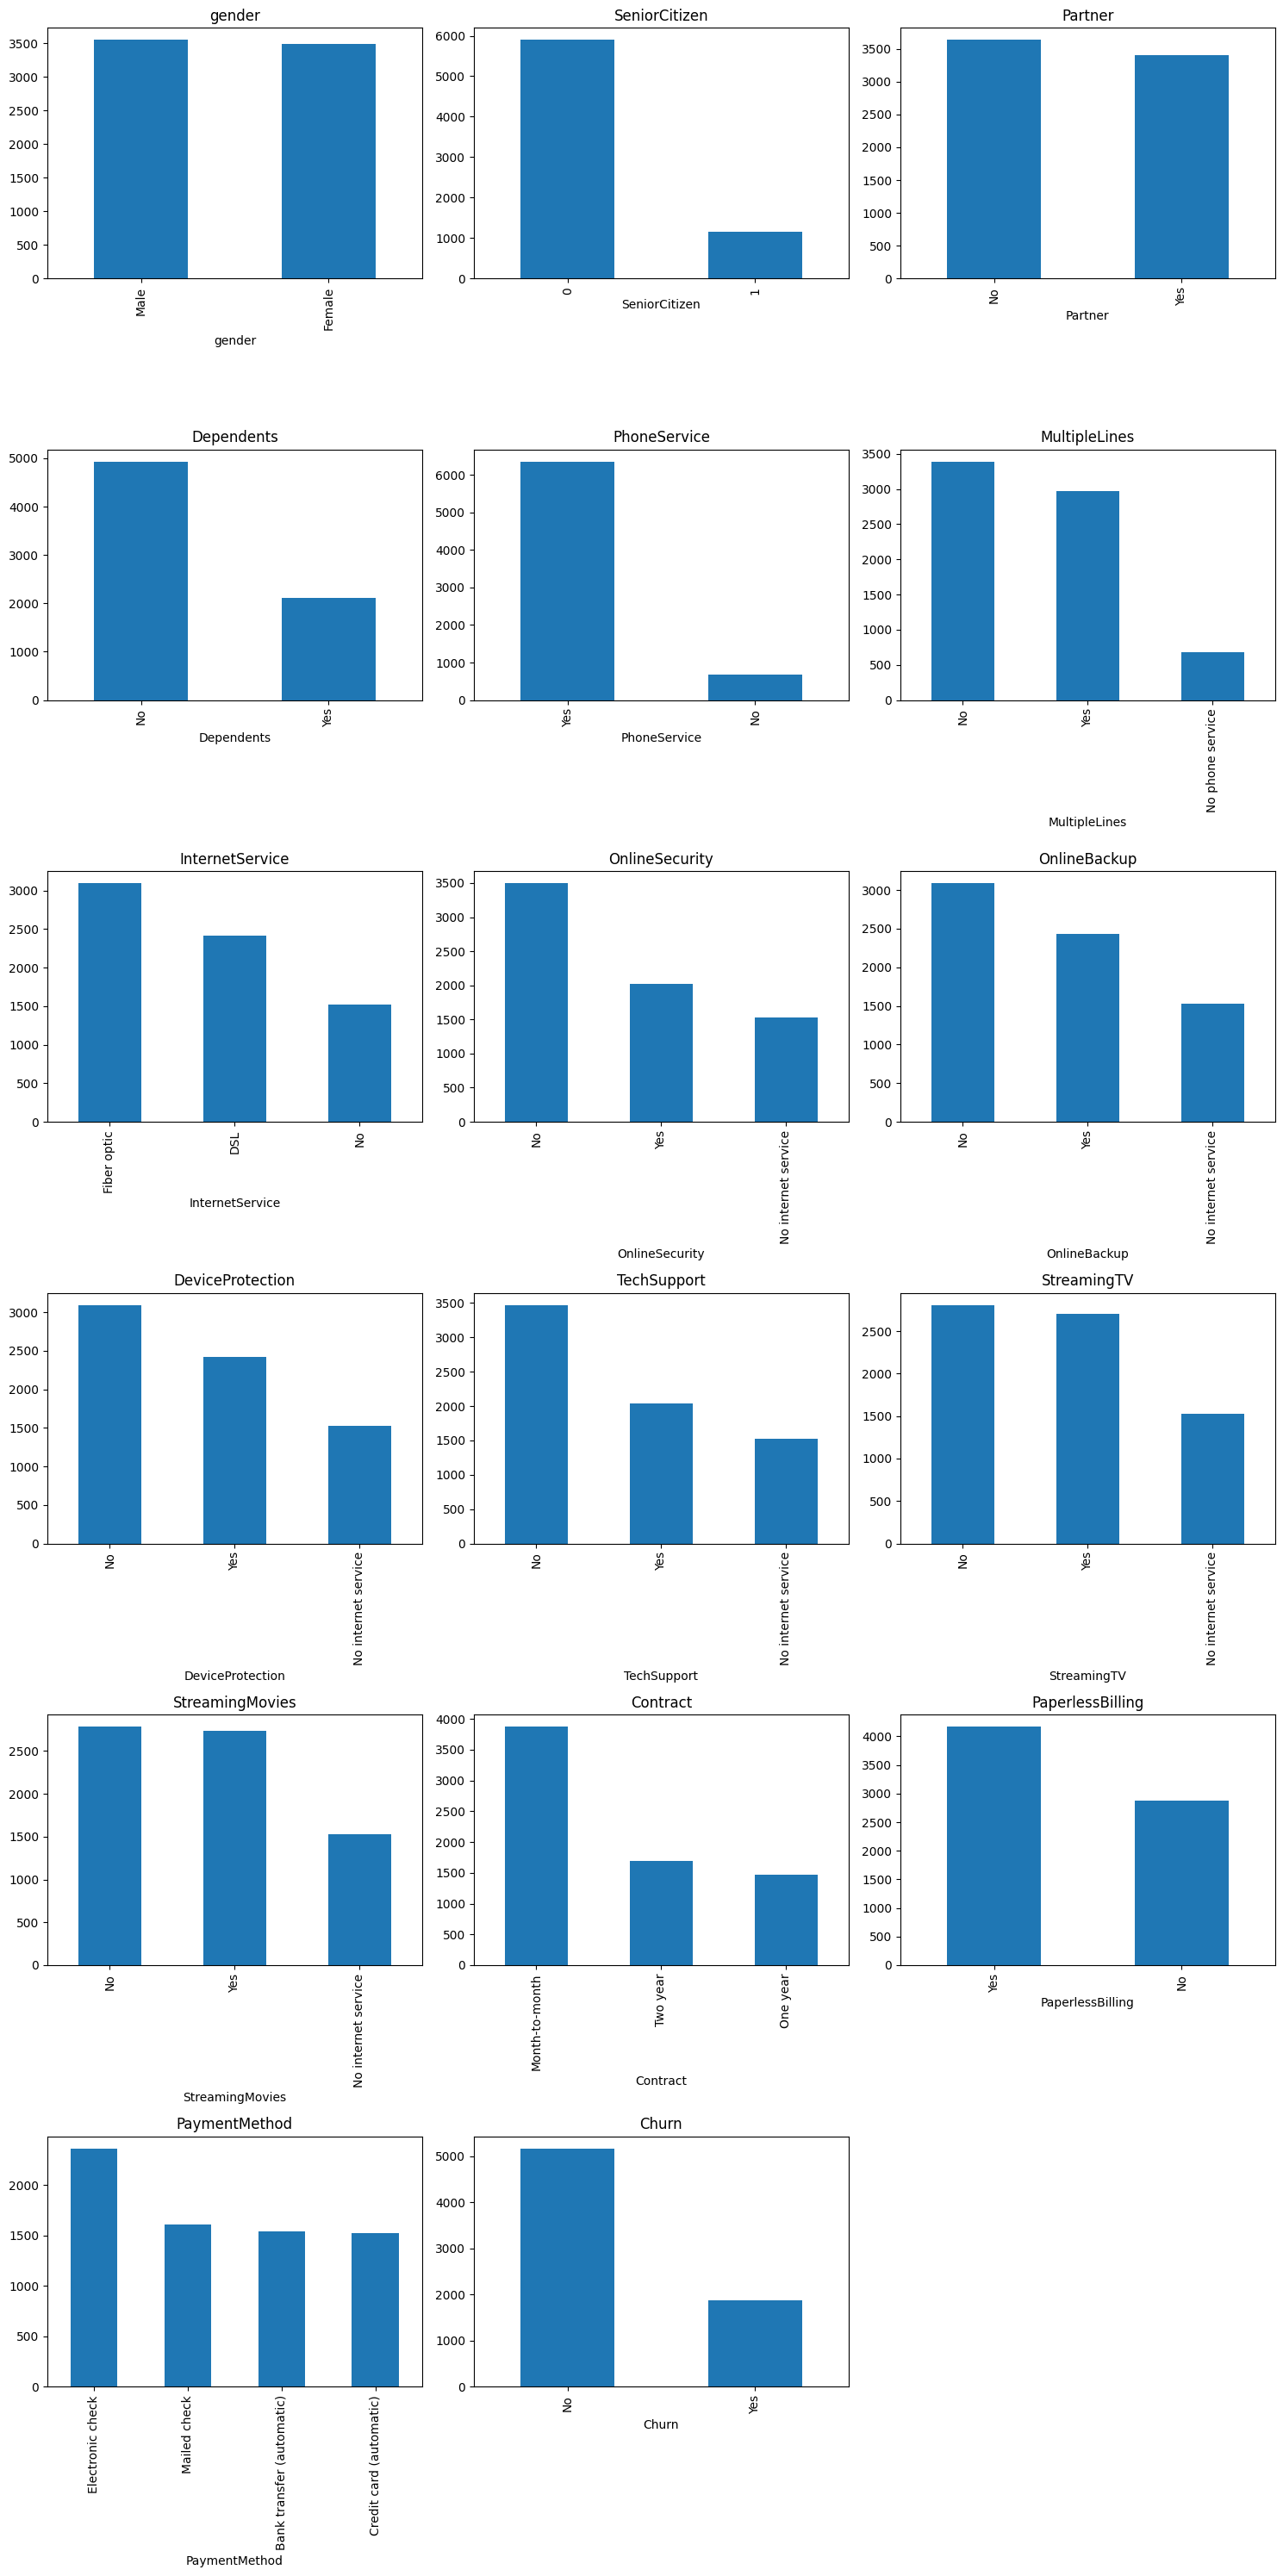

In [29]:
import matplotlib.pyplot as plt
import math

# Assuming you have a predefined list of categorical columns called cat_cols
num_cols = len(cat_cols) - 1  # Exclude 'customerID'

# Calculate number of rows required for the given number of columns (3 in this case)
num_rows = math.ceil(num_cols / 3)

# Define the size of the figure, adjust figsize as needed
plt.figure(figsize=(15, 5 * num_rows))

idx = 1  # Start index for subplotting
for col in cat_cols:
    if col == 'customerID':
        continue
    plt.subplot(num_rows, 3, idx)
    df[col].value_counts().plot(kind='bar', title=col)
    idx += 1

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1, wspace=0.1)

plt.tight_layout()
plt.show()


Berikut scatterplot antar numerical column

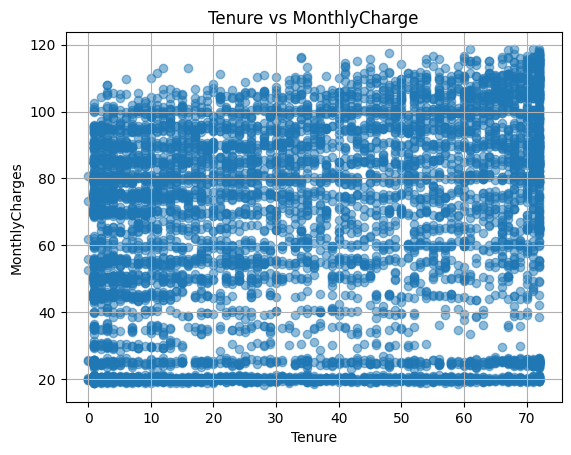

In [21]:
plt.scatter(df['tenure'], df['MonthlyCharges'], alpha=0.5)
plt.title('Tenure vs MonthlyCharge')
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
plt.grid(True)
plt.show()

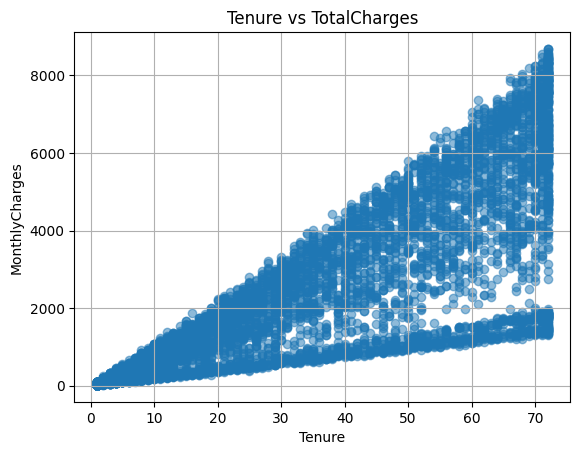

In [22]:
plt.scatter(df['tenure'], df['TotalCharges'], alpha=0.5)
plt.title('Tenure vs TotalCharges')
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
plt.grid(True)
plt.show()

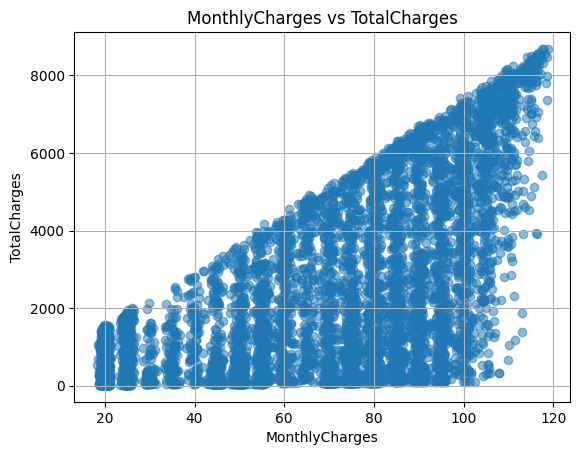

In [23]:
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.5)
plt.title('MonthlyCharges vs TotalCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.grid(True)
plt.show()

MonthlyCharges dan TotalCharges memiliki korelasi positif sementara tenure tidak memiliki korelasi dengan monthlycharges dan totalcharges.

# Feature Engineering

### Handling Missing Value

In [24]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Terdapat 11 baris missing pada `TotalCharges`. Untuk itu dilakukan drop karena jumlahnya masih sedikit.

In [25]:
df = df.dropna()

In [26]:
# Cek baris setelah didrop

df.shape

(7032, 21)

Masih terdapat 7032 baris setelah penghapusan missing value.

### Split Dataset

Memisahkan feature dan target

In [27]:
# Memisahkan X dan y (target)
X = df.drop('Churn', axis=1)
y = df['Churn']

Memisahkan data train dan data test

In [28]:
# Membuat 80% data sebagai train dan 20% sebagai test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5625, 20)
Test Size :  (1407, 20)


Size dari data train sebesar 5634, dan size dari data test adalah 1409

### Feature Selection

**Menggunakan Heatmap untuk feature selection awal**

Akan dicari korelasi antara fitur numerik dengan `Churn`.

<Axes: >

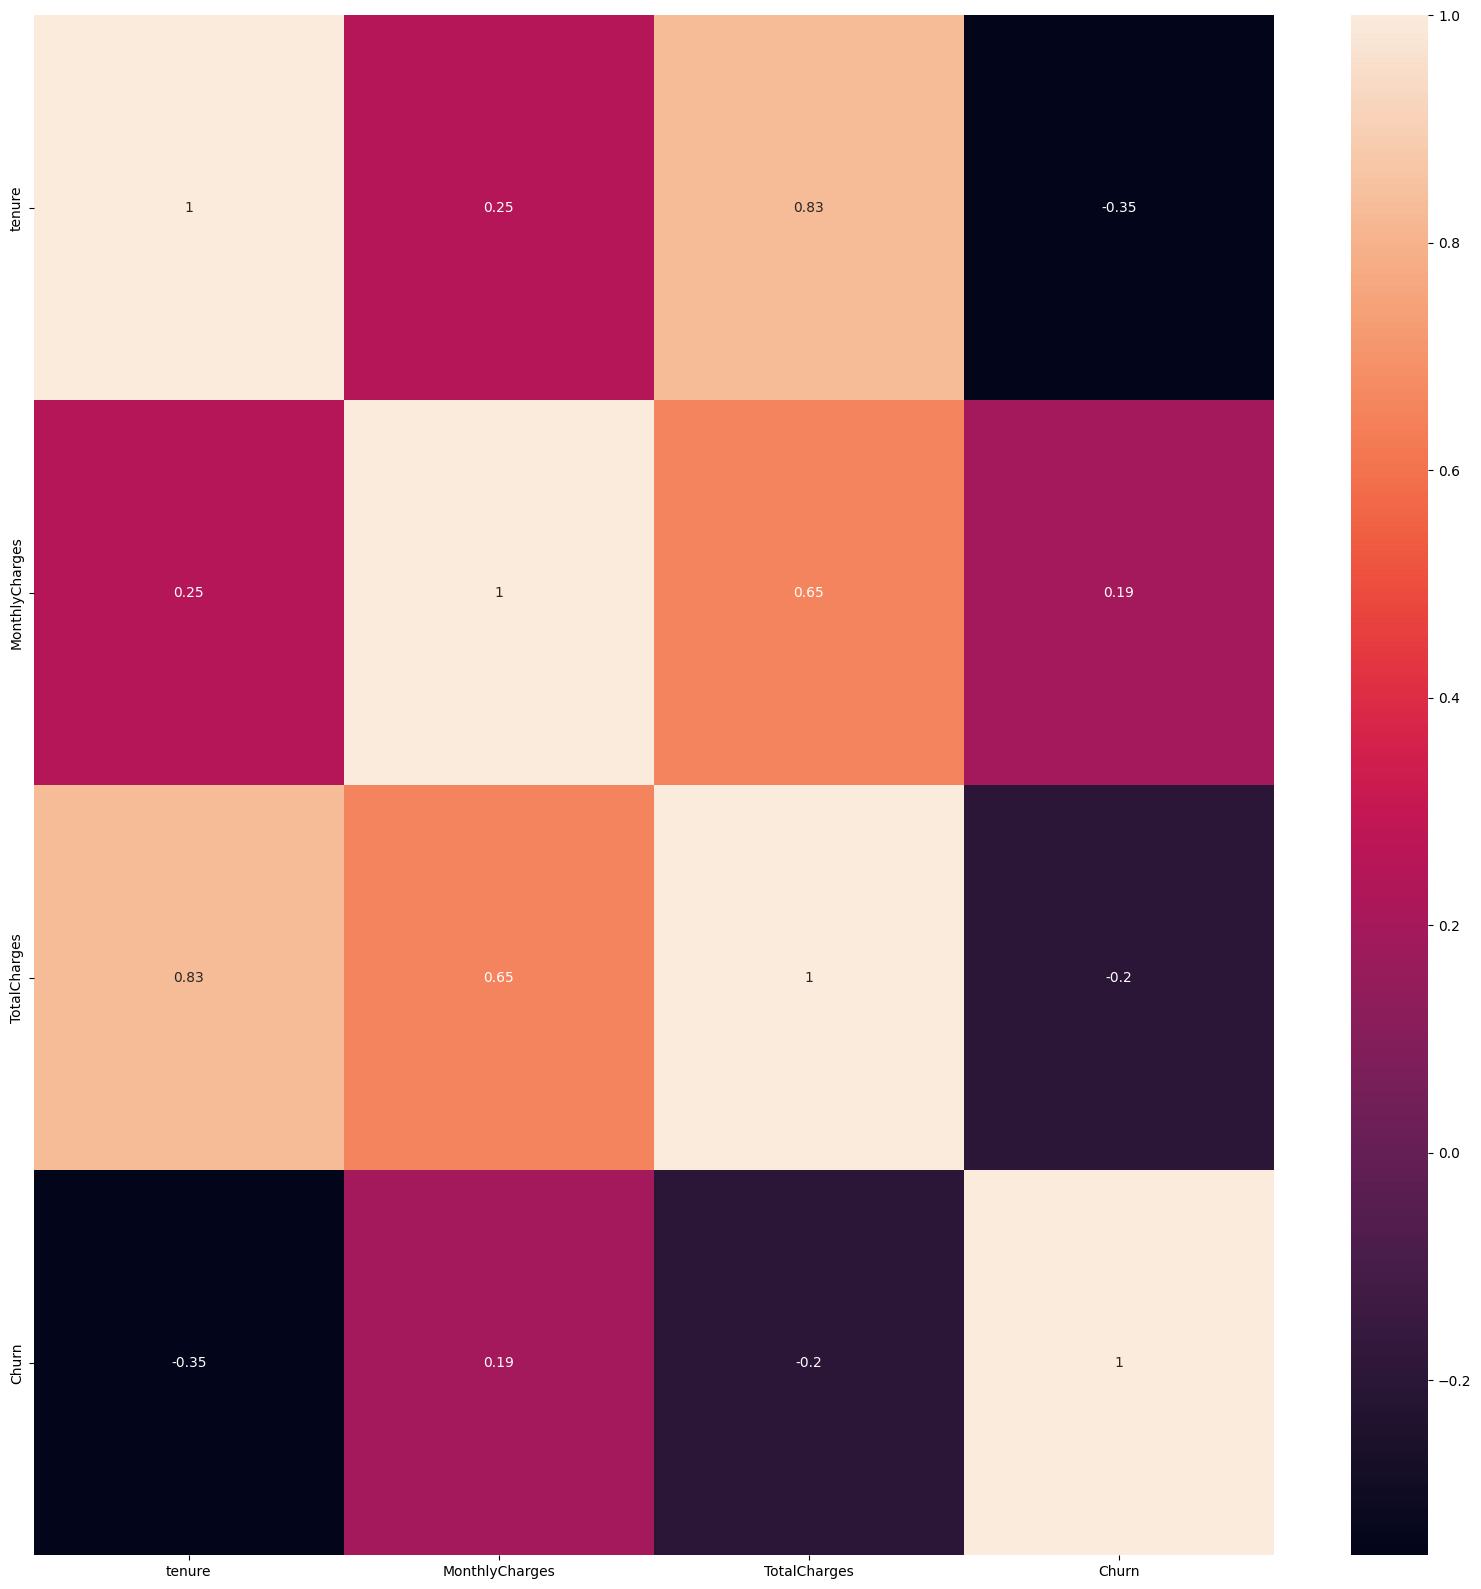

In [29]:
# Memasukkan kolom numerik dan churn
Feature = num_cols.copy()
Feature.append('Churn')

# Menggunakan label encoder untuk Churn
FeatureEncoded = df[Feature].apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
plt.figure(figsize =(20,20))
correlation=FeatureEncoded[FeatureEncoded.columns].corr()
sns.heatmap(correlation,annot=True)


Terdapat correlation dari kolom numerical terhadap churn. Meskipun berkorelasi lemah, namun saya tetap memutuskan untuk mengambil feature tersebut karena tidak adanya numerical feature lain yang berkorelasi lebih kuat.

Untuk kolom kategorikal, saya menggunakan Chi-Square test dengan K-Best

In [30]:
# Encode sementara menggunakan Label Encoder (untuk memudahkan saja)
new_df = df[cat_cols].copy()
new_df = new_df[cat_cols].apply(lambda x: LabelEncoder().fit_transform(x))

# Menggunakan K-Best dengan function nya adalah Chi-Square
kbest = SelectKBest(score_func=chi2,k=5)
res = kbest.fit(new_df.drop('Churn', axis=1), new_df['Churn'])

# Result table
result = pd.Series(res.scores_)
result.index = new_df.drop('Churn', axis=1).columns
result.sort_values(ascending=False)

customerID          2628.775710
Contract            1111.759054
OnlineSecurity       550.437364
TechSupport          522.164716
OnlineBackup         229.441123
DeviceProtection     190.688004
SeniorCitizen        133.482766
Dependents           131.271509
PaperlessBilling     104.979224
Partner               81.857769
PaymentMethod         59.240507
MultipleLines          9.735960
InternetService        9.715269
StreamingMovies        8.357624
StreamingTV            7.373234
gender                 0.254297
PhoneService           0.092948
dtype: float64

Saya memilih feature dengan score lebih dari 100, selain customerID. Untuk itu feature kategorikal yang saya pilih adalah 'Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'SeniorCitizen', 'Dependents', 'PaperlessBilling'.

In [31]:
# Membuat list untuk menampung feature yang dipilih
selected_num_cols = num_cols
selected_cat_cols = ['Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'SeniorCitizen', 'Dependents', 'PaperlessBilling']

### Feature Scaling dan Encoding

Scaling digunakan agar data numerik tidak ada yang mendominasi.Scaling menggunakan `StandardScaler` karena data berdistribusi normal. 

In [32]:
# Scale numerical column menggunakan standard scaler

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train[selected_num_cols])

Encoding kolom kategorikal menggunakan `One Hot Encoder` karena seluruh kolom kategorikal bertipe nominal.

In [33]:
# Encoding menggunakan OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Menghilangkan kolom Churn 
cat_cols.pop()

# Encoding
X_train_encoded = one_hot_encoder.fit_transform(X_train[selected_cat_cols]).toarray()

Menggabungkan kolom kategorik dengan numerik

In [34]:
# Menggabungkan dengan pd.concat

X_train_final = pd.DataFrame(np.concatenate([X_train_scaled, X_train_encoded], axis=1))

Encoding kolom target (churn) dengan `Label Encoder` karena kolom ini adalah kolom target dan kardinalitasnya 2.

In [35]:
# Encoding kolom target dengan labelEncoder
label_encoder = LabelEncoder()
y_train_final = label_encoder.fit_transform(y_train)

Untuk mempermudah, berikut ini adalah Pipeline untuk melakukan scaling dan encoding

In [36]:
NUM_cols = Pipeline([("standardscaler", StandardScaler())])
CAT_cols = Pipeline([("OHE", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', NUM_cols, selected_num_cols),
        ('categorical', CAT_cols, selected_cat_cols)
    ]
)

# Model Definition

Berikut adalah model yang saya pakai, yaitu KNN, SVM, Decision Tree, Random Forest, dan AdaBoost.

### Model KNN

In [37]:
pipeKNN = Pipeline([("KNNscaler",preprocessor), ("KNN",KNeighborsClassifier())])

### Model SVM

In [38]:
pipeSVM = Pipeline([("SVMscaler", preprocessor), ("svm", SVC())])

### Model Decision Tree

In [39]:
pipeDT = Pipeline([("DTsacler",preprocessor), ("DTC",DecisionTreeClassifier(random_state=47))])

### Model Random Forest

In [40]:
pipeRF = Pipeline([("RFsacler",preprocessor), ("RFC",RandomForestClassifier(random_state=47))])

### Model AdaBoost

In [41]:
pipeADA = Pipeline([("AdaBoostscaler",preprocessor), ("AdaBoost",AdaBoostClassifier(DecisionTreeClassifier(random_state=47)))])

# Model Training

Training masing-masing model dan menilai performa masing-masing model menggunakan Cross Validation dengan n_split = 5

### Train KNN

In [42]:
kf=KFold(n_splits=5)
scoresKNN = cross_val_score(pipeKNN, X_train, y_train_final, cv=kf, scoring='recall')
print("Cross Validation array           :",scoresKNN)
print("Best Cross Validation score      :",scoresKNN.mean())
print("Standar Deviasi Cross Validation :",scoresKNN.std())

Cross Validation array           : [0.53177258 0.4950495  0.5        0.42957746 0.50798722]
Best Cross Validation score      : 0.4928773530874696
Standar Deviasi Cross Validation : 0.034068967111311334


### Train SVM

In [43]:
kf=KFold(n_splits=5)
scoressvm = cross_val_score(pipeSVM, X_train, y_train_final, cv=kf, scoring='recall')
print("Cross Validation array           :",scoressvm)
print("Best Cross Validation score      :",scoressvm.mean())
print("Standar Deviasi Cross Validation :",scoressvm.std())

Cross Validation array           : [0.52173913 0.51815182 0.50986842 0.45422535 0.48242812]
Best Cross Validation score      : 0.4972825667595166
Standar Deviasi Cross Validation : 0.025560247395259687


### Train Decision Tree

In [44]:
kf=KFold(n_splits=5)
scoresDT = cross_val_score(pipeDT, X_train, y_train_final, cv=kf, scoring='recall')
print("Cross Validation array           :",scoresDT)
print("Best Cross Validation score      :",scoresDT.mean())
print("Standar Deviasi Cross Validation :",scoresDT.std())

Cross Validation array           : [0.47826087 0.46864686 0.48684211 0.50704225 0.47603834]
Best Cross Validation score      : 0.48336608633882355
Standar Deviasi Cross Validation : 0.013183764336751664


### Train Random Forest

In [45]:
kf=KFold(n_splits=5)
scoresRF = cross_val_score(pipeRF, X_train, y_train_final, cv=kf, scoring='recall')
print("Cross Validation array           :",scoresRF)
print("Best Cross Validation score      :",scoresRF.mean())
print("Standar Deviasi Cross Validation :",scoresRF.std())

Cross Validation array           : [0.4916388  0.48514851 0.46710526 0.43661972 0.47284345]
Best Cross Validation score      : 0.47067114855701886
Standar Deviasi Cross Validation : 0.019111099967058003


### Train AdaBoost

In [46]:
kf=KFold(n_splits=5)
scoresADA = cross_val_score(pipeADA, X_train, y_train_final, cv=kf, scoring='recall')
print("Cross Validation array           :",scoresADA)
print("Best Cross Validation score      :",scoresADA.mean())
print("Standar Deviasi Cross Validation :",scoresADA.std())

Cross Validation array           : [0.5451505  0.49174917 0.52631579 0.48591549 0.50159744]
Best Cross Validation score      : 0.510145680622124
Standar Deviasi Cross Validation : 0.022295361316793893


### Hyperparameter Tuning

Berdasarkan cross validation score, model terbaik yang dapat dipakai adalah SVM dan AdaBoost. Untuk itu dilakukan hyperparameter tuning agar mendapatkan model yang lebih baik.

**Hyperparameter Tuning SVM**

In [47]:
param_grid = {'svm__C': [0.1, 1, 10, 100, 1000],  
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'svm__kernel': ['rbf']}  
  
grid = GridSearchCV(pipeSVM, param_grid, refit=True, verbose=2,scoring='recall') 
grid.fit(X_train, y_train_final)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ..........svm__C=0.1, svm__gamma=1, svm__kernel=rbf; total time=   0.4s
[CV] END ..........svm__C=0.1, svm__gamma=1, svm__kernel=rbf; total time=   0.4s
[CV] END ..........svm__C=0.1, svm__gamma=1, svm__kernel=rbf; total time=   0.4s
[CV] END ..........svm__C=0.1, svm__gamma=1, svm__kernel=rbf; total time=   0.4s
[CV] END ..........svm__C=0.1, svm__gamma=1, svm__kernel=rbf; total time=   0.4s
[CV] END ........svm__C=0.1, svm__gamma=0.1, svm__kernel=rbf; total time=   0.3s
[CV] END ........svm__C=0.1, svm__gamma=0.1, svm__kernel=rbf; total time=   0.3s
[CV] END ........svm__C=0.1, svm__gamma=0.1, svm__kernel=rbf; total time=   0.3s
[CV] END ........svm__C=0.1, svm__gamma=0.1, svm__kernel=rbf; total time=   0.3s
[CV] END ........svm__C=0.1, svm__gamma=0.1, svm__kernel=rbf; total time=   0.3s
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=   0.3s
[CV] END .......svm__C=0.1, svm__gamma=0.01, sv

GridSearchCV(estimator=Pipeline(steps=[('SVMscaler',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('OHE',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Contract',
                                                                          'OnlineSecurity',
                                                                          'TechSupport',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'SeniorCitizen',
                                                                          'Dependents',
                                                                          'PaperlessBilling'])])),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100, 1000],
                         'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['rbf']},
             scoring='recall', verbose=2)

In [48]:
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters:  {'svm__C': 1000, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best cross-validation score: 0.56


Best Score setelah dilakukan hyperparameter tuning adalah 0.56, meningkat jika dibandingkan sebelum tuning (0.49).

**Menyimpan best model SVM ke dalam sebuah variabel**

In [49]:
best_svm_model = grid.best_estimator_

In [50]:
best_svm_model

Pipeline(steps=[('SVMscaler',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Contract', 'OnlineSecurity',
                                                   'TechSupport',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'SeniorCitizen',
                                                   'Dependents',
                                                   'PaperlessBilling'])])),
                ('svm', SVC(C=1000, gamma=0.1))])

**Hyperparameter Tuning AdaBoost**

In [51]:
param_grid_ada = {'AdaBoost__n_estimators': [50, 100, 200],      
            'AdaBoost__learning_rate': [0.01, 0.05, 0.1, 0.5, 1], 
            'AdaBoost__base_estimator__max_depth': [1, 2, 3]}
  
gridAda = GridSearchCV(pipeADA, param_grid_ada, refit=True, verbose=2, scoring='recall') 
gridAda.fit(X_train, y_train_final)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[CV] END AdaBoost__base_estimator__max_depth=1, AdaBoost__learning_rate=0.01, AdaBoost__n_estimators=50; total time=   0.1s
[CV] END AdaBoost__base_estimator__max_depth=1, AdaBoost__learning_rate=0.01, AdaBoost__n_estimators=50; total time=   0.2s
[CV] END AdaBoost__base_estimator__max_depth=1, AdaBoost__learning_rate=0.01, AdaBoost__n_estimators=50; total time=   0.1s
[CV] END AdaBoost__base_estimator__max_depth=1, AdaBoost__learning_rate=0.01, AdaBoost__n_estimators=50; total time=   0.1s
[CV] END AdaBoost__base_estimator__max_depth=1, AdaBoost__learning_rate=0.01, AdaBoost__n_estimators=50; total time=   0.1s
[CV] END AdaBoost__base_estimator__max_depth=1, AdaBoost__learning_rate=0.01, AdaBoost__n_estimators=100; total time=   0.3s
[CV] END AdaBoost__base_estimator__max_depth=1, AdaBoost__learning_rate=0.01, AdaBoost__n_estimators=100; total time=   0.3s
[CV] END AdaBoost__base_estimator__max_depth=1, AdaBoost__learning_rate=0.01, AdaBoost__n_estimators=100; total time=   0.4s
[CV] 

GridSearchCV(estimator=Pipeline(steps=[('AdaBoostscaler',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('OHE',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Contract',
                                                                          'OnlineSecurity',
                                                                          'TechSupport',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'SeniorCitizen',
                                                                          'Dependents',
                                                                          'PaperlessBilling'])])),
                                       ('AdaBoost',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=47)))]),
             param_grid={'AdaBoost__base_estimator__max_depth': [1, 2, 3],
                         'AdaBoost__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'AdaBoost__n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

In [64]:
print("Best parameters: ", gridAda.best_params_)
print("Best cross-validation score: {:.2f}".format(gridAda.best_score_))

Best parameters:  {'AdaBoost__base_estimator__max_depth': 1, 'AdaBoost__learning_rate': 1, 'AdaBoost__n_estimators': 200}
Best cross-validation score: 0.54


Dari Hasil Tuning di atas, model SVM akan dipakai karena nilai cross-validation scorenya lebih tinggi.

# Model Evaluation

Model yang akan dianalisis adalah model terbaik yaitu SVM menggunakan parameter hasil tuning.

**Evaluation pada Data Train**

In [54]:
# Menerapkan label encoding pada data test
y_test_final = label_encoder.transform(y_test)

In [55]:
# Melihat recall score dari data train dan data test
y_pred_train = best_svm_model.predict(X_train)
y_pred_test = best_svm_model.predict(X_test)
print('recall train:', recall_score(y_train_final, y_pred_train))
print('recall test:', recall_score(y_test_final, y_pred_test))

recall train: 0.6986027944111777
recall test: 0.5601092896174863


Confusion Matrix dan Classification Report pada data train

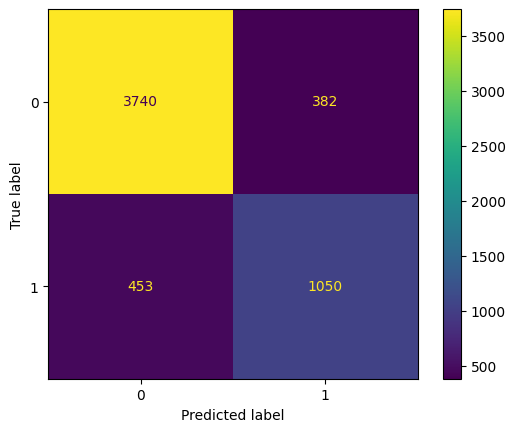

In [56]:

conf = confusion_matrix(y_train_final,y_pred_train, labels=best_svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=best_svm_model.classes_)
disp.plot()
plt.show()


In [57]:
print(classification_report(y_train_final,y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4122
           1       0.73      0.70      0.72      1503

    accuracy                           0.85      5625
   macro avg       0.81      0.80      0.81      5625
weighted avg       0.85      0.85      0.85      5625



**Confusion Matrix dan Classification Report pada data test**

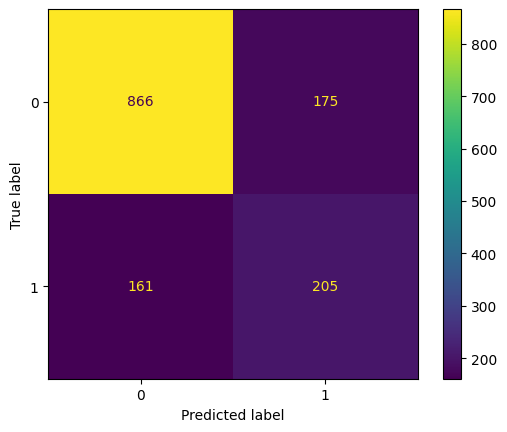

In [58]:
conf = confusion_matrix(y_test_final,y_pred_test, labels=best_svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=best_svm_model.classes_)
disp.plot()
plt.show()

In [59]:
print(classification_report(y_test_final,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1041
           1       0.54      0.56      0.55       366

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.69      1407
weighted avg       0.76      0.76      0.76      1407



Pada data train, nilai recall model yang telah dibuat sebesar 0.70, namun recall pada data test hanya sebesar 0.56. Hal ini menandakan bahwa terjadi overfitting pada model. Untuk itu ke depannya perlu dilakukan peningkatan model. Peningkatan model dapat berupa pemilihan feature yang lebih baik, hyperparameter tuning yang lebih mendalam, maupun memilih metode lain seperti ANN.

# Model Saving

In [60]:
with open('model.pkl', 'wb') as file_1:
    pickle.dump(best_svm_model, file_1)

# Kesimpulan

Churn adalah situasi ketika pelanggan memutuskan untuk mengakhiri langganan atau berhenti memanfaatkan layanan yang ditawarkan. Mendapatkan pelanggan baru tentu lebih sulit dibanding mempertahankan pelanggan yang sudah ada. Oleh karena itu, memperhatikan churn sangat penting untuk menghindari ketidakstabilan perusahaan. 

Salah satu upaya untuk meminimalisir churn adalah dengan melakukan analisis dari data yang sudah ada. Saya membuat model menggunakan SVM (Support Vector Machine). Metric yang saya gunakan adalah Recall untuk meminimumkan False Negative (Customer). Model ini dapat memprediksi dengan nilai recall sebesar 0.70 pada data train dan 0.56 pada data test.

# Conceptual Problems

1. Bagging adalah salah satu tipe dari ensemble learning (teknik machine learning yang menggabungkan lebih dari satu model). Bagging merupakan singkatan dari Bootstrap Aggregating. Dinamakan bagging karena mengkombinasikan Bootstrapping dan Aggregation untuk membentuk suatu ensemble model. Pada bagging, multiple model dilatih secara independen pada subset data train yang berbeda-beda (melalui bootstrapping). Prediksi dari masing-masing model kemudian digabungkan, biasanya dengan menggunakan majority voting untuk kasus klasifikasi atau menggunakan rata-rata untuk kasus regresi. Salah satu contoh dari bagging adalah Random Forest. Random Forest adalah ensemble model dengan setiap independen modelnya berupa Decision Tree.

2. Random Forest menggunakan teknik bagging, dengan setiap independent modelnya berupa Decision Tree. Prediksi dari semua decision tree dirata-ratakan (untuk kasus regresi) atau diambil majority voting (untuk kasus klasifikasi).

    Sementara itu AdaBoost menggunakan teknik boosting, model baru dipengaruhi dari model sebelumnya (sequential training). Pelatihan model baru menggunakan data yang terklasifikasikan dengan salah oleh model sebelumnya. Prediksi dari masing-masing model digabungkan menggunakan weighted averaging.

3. Cross Validation adalah teknik untuk menilai performa model dengan cara membagi dataset menjadi beberapa subset, kemudian menggunakan salah satu subset sebagai data test dan sisanya sebagai data train. Penilaian model dilakukan berulangkali hingga seluruh subset pernah menjadi data test. Tujuan dari Cross Validation adalah memastikan bahwa performa model stabil dan mencegah overfitting.